El primer acercamiento se realizó con un archivo "230303_DATOS_BASICOS_UBICACION_USUARIO.csv" con 100.000 instancias y 13 características como NIS	GENERO	FECHA_NACIMIENTO	ESTADO_CIVIL	ESTRATO	PUNTAJE_ICFES	SISBEN	DBU_HIJOS	COD_PAIS_RESISENCIA	COD_DPTO_RESIDENCIA	COD_MUNICIPIO_RESIDENCIA	COD_ZONA_RESIDENCIA	COD_BARRIO_RESIDENCIA

-Identificación de archivo a procesar

-Cargue del archivo en Github

-Cargue del archivo desde Github

-Exploración de las caracteríticas del archivo

-Identificación de características

-Identificación de características categóricas y las características numéricas

-Exploración de valores en las características:

  *Faltantes

  *Únicos


Cargue del archivo desde github

In [ ]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns
#https://drive.google.com/file/d/1flzdpualWKZrAtri3LvlOuAL0dgeFttj/view?usp=share_link

Cargue del conjunto de datos 230303_DATOS_BASICOS_UBICACION_USUARIO.csv

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/armaacum/data/main/230303_DATOS_BASICOS_UBICACION_USUARIO.csv',encoding='latin1', sep = ';')

#Armando

Se exploran las caracteríticas del archivo

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   NIS                       100000 non-null  int64  
 1   GENERO                    100000 non-null  object 
 2   FECHA_NACIMIENTO          100000 non-null  object 
 3   ESTADO_CIVIL              100000 non-null  object 
 4   ESTRATO                   100000 non-null  int64  
 5   PUNTAJE_ICFES             1798 non-null    object 
 6   SISBEN                    0 non-null       float64
 7   DBU_HIJOS                 0 non-null       float64
 8   COD_PAIS_RESISENCIA       100000 non-null  int64  
 9   COD_DPTO_RESIDENCIA       100000 non-null  int64  
 10  COD_MUNICIPIO_RESIDENCIA  100000 non-null  int64  
 11  COD_ZONA_RESIDENCIA       3677 non-null    float64
 12  COD_BARRIO_RESIDENCIA     3204 non-null    float64
dtypes: float64(4), int64(5), object(4)
memory usa

In [ ]:
df.shape

(100000, 13)

El archivo contiene 39102 intancias por 18 características

Se identifican los nombre de todas las características

In [ ]:
columns = df.columns.values
columns

array(['NIS', 'GENERO', 'FECHA_NACIMIENTO', 'ESTADO_CIVIL', 'ESTRATO',
       'PUNTAJE_ICFES', 'SISBEN', 'DBU_HIJOS', 'COD_PAIS_RESISENCIA',
       'COD_DPTO_RESIDENCIA', 'COD_MUNICIPIO_RESIDENCIA',
       'COD_ZONA_RESIDENCIA', 'COD_BARRIO_RESIDENCIA'], dtype=object)

Se identifican las características categóricas y las características numéricas

In [ ]:
for t in columns:
  print(t, df[t].dtype)

NIS int64
GENERO object
FECHA_NACIMIENTO object
ESTADO_CIVIL object
ESTRATO int64
PUNTAJE_ICFES object
SISBEN float64
DBU_HIJOS float64
COD_PAIS_RESISENCIA int64
COD_DPTO_RESIDENCIA int64
COD_MUNICIPIO_RESIDENCIA int64
COD_ZONA_RESIDENCIA float64
COD_BARRIO_RESIDENCIA float64


In [ ]:
categoricos_col =[]
for t in columns:
  if df[t].dtype == 'object':
    categoricos_col.append(t)
categoricos_col


['GENERO', 'FECHA_NACIMIENTO', 'ESTADO_CIVIL', 'PUNTAJE_ICFES']

In [ ]:
numericas_col=[]
for t in columns:
  if df[t].dtype == 'int64':
    numericas_col.append(t)
numericas_col

['NIS',
 'ESTRATO',
 'COD_PAIS_RESISENCIA',
 'COD_DPTO_RESIDENCIA',
 'COD_MUNICIPIO_RESIDENCIA']

In [ ]:
data=[]
for d in columns:
  w=df[d].unique()
  print("Cantidad de valores únicos en ",d, " = ",len(w))


Cantidad de valores únicos en  NIS  =  100000
Cantidad de valores únicos en  GENERO  =  2
Cantidad de valores únicos en  FECHA_NACIMIENTO  =  20797
Cantidad de valores únicos en  ESTADO_CIVIL  =  7
Cantidad de valores únicos en  ESTRATO  =  6
Cantidad de valores únicos en  PUNTAJE_ICFES  =  468
Cantidad de valores únicos en  SISBEN  =  1
Cantidad de valores únicos en  DBU_HIJOS  =  1
Cantidad de valores únicos en  COD_PAIS_RESISENCIA  =  33
Cantidad de valores únicos en  COD_DPTO_RESIDENCIA  =  164
Cantidad de valores únicos en  COD_MUNICIPIO_RESIDENCIA  =  1248
Cantidad de valores únicos en  COD_ZONA_RESIDENCIA  =  348
Cantidad de valores únicos en  COD_BARRIO_RESIDENCIA  =  1644


In [ ]:
def check(data):
    l=[]
    columns=data.columns
    for col in columns:
        dtypes=data[col].dtypes
        nunique=data[col].nunique()
        sum_null=data[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    res=pd.DataFrame(l)
    res.columns=['column','dtypes','nunique','sum_null']
    return res
check(df)

,column,dtypes,nunique,sum_null
0,NIS,int64,100000,0
1,GENERO,object,2,0
2,FECHA_NACIMIENTO,object,20797,0
3,ESTADO_CIVIL,object,7,0
4,ESTRATO,int64,6,0
5,PUNTAJE_ICFES,object,467,98202
6,SISBEN,float64,0,100000
7,DBU_HIJOS,float64,0,100000
8,COD_PAIS_RESISENCIA,int64,33,0
9,COD_DPTO_RESIDENCIA,int64,164,0


In [ ]:
df.isnull().sum()

NIS                              0
GENERO                           0
FECHA_NACIMIENTO                 0
ESTADO_CIVIL                     0
ESTRATO                          0
PUNTAJE_ICFES                98202
SISBEN                      100000
DBU_HIJOS                   100000
COD_PAIS_RESISENCIA              0
COD_DPTO_RESIDENCIA              0
COD_MUNICIPIO_RESIDENCIA         0
COD_ZONA_RESIDENCIA          96323
COD_BARRIO_RESIDENCIA        96796
dtype: int64

In [ ]:
df["GENERO"].value_counts()

GENERO
F    52928
M    47072
Name: count, dtype: int64

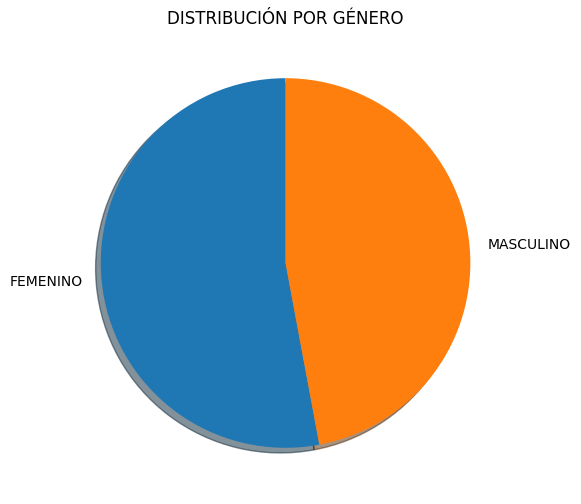

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('DISTRIBUCIÓN POR GÉNERO')
ay = df["GENERO"].value_counts()
mylabels = ["FEMENINO", "MASCULINO"]
plt.pie(ay, labels = mylabels, startangle = 90, shadow = True)
plt.show()

In [ ]:
print("FEMENINO  {:.2f} %".format(df.apply(lambda x: x['GENERO'] == 'F', axis=1).sum() / len(df) *100))
print("MASCULINO {:.2f} %".format(df.apply(lambda x: x['GENERO'] == 'M', axis=1).sum() / len(df) *100))

FEMENINO  52.93 %
MASCULINO 47.07 %


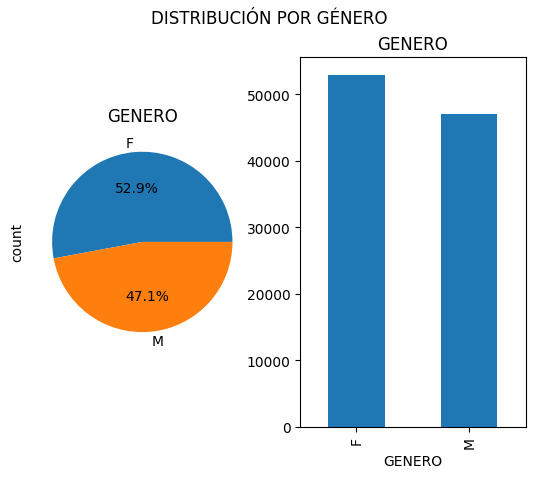

In [ ]:
# INTENTO PARA GENERAR GRAFICA CON PORCENTAJES PARA GENERO
genero = df["GENERO"].value_counts()
plt.subplot(1,2,1)
genero.plot(kind="pie", autopct='%1.01f%%')
plt.title("GENERO")
#plt.suptitle("suptitle")

plt.subplot(1,2,2)
genero.plot(kind="bar")
plt.title("GENERO")
plt.suptitle("DISTRIBUCIÓN POR GÉNERO")
plt.show()

In [ ]:
#Estado civil del usuario. Valores de chequeo: V - Viudo; E - Separado ; U - Unión Libre ; C - Casado; S - Soltero; I - Indiferente ,  N No Ingresado
df["ESTADO_CIVIL"].value_counts()

ESTADO_CIVIL
N    56620
S    25091
C     7067
U     7056
I     3030
E      936
V      200
Name: count, dtype: int64

In [ ]:
df["ESTADO_CIVIL"].unique()

array(['N', 'E', 'S', 'C', 'I', 'U', 'V'], dtype=object)

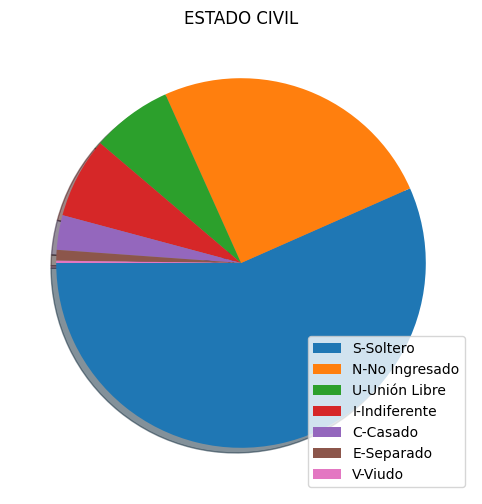

In [ ]:
plt.figure(figsize=(8,6))
plt.title('ESTADO CIVIL')
ay = df["ESTADO_CIVIL"].value_counts()
#mylabels = df["ESTADO_CIVIL"].unique() #["V-Viudo", "E-Separado", "U-Unión Libre", "C-Casado", "S-Soltero", "I-Indiferente", "N-No Ingresado"]
mylabels = ["S-Soltero","N-No Ingresado", "U-Unión Libre","I-Indiferente" ,"C-Casado","E-Separado","V-Viudo"]
plt.pie(df["ESTADO_CIVIL"].value_counts(),  startangle = 180,shadow = True)
plt.legend(mylabels, loc='lower right',)
plt.show()

In [ ]:
print("SOLTERO  {:.2f} %".format(df.apply(lambda x: x['ESTADO_CIVIL'] == 'S', axis=1).sum() / len(df) *100))
print("UNION LIBRE {:.2f} %".format(df.apply(lambda x: x['ESTADO_CIVIL'] == 'U', axis=1).sum() / len(df) *100))
print("CASADO {:.2f} %".format(df.apply(lambda x: x['ESTADO_CIVIL'] == 'C', axis=1).sum() / len(df) *100))
print("VIUDO {:.2f} %".format(df.apply(lambda x: x['ESTADO_CIVIL'] == 'V', axis=1).sum() / len(df) *100))
print("SEPARADO {:.2f} %".format(df.apply(lambda x: x['ESTADO_CIVIL'] == 'E', axis=1).sum() / len(df) *100))
print("INDIFERENTE {:.2f} %".format(df.apply(lambda x: x['ESTADO_CIVIL'] == 'I', axis=1).sum() / len(df) *100))
print("NO INGRESADO {:.2f} %".format(df.apply(lambda x: x['ESTADO_CIVIL'] == 'N', axis=1).sum() / len(df) *100))


SOLTERO  25.09 %
UNION LIBRE 7.06 %
CASADO 7.07 %
VIUDO 0.20 %
SEPARADO 0.94 %
INDIFERENTE 3.03 %
NO INGRESADO 56.62 %


<Axes: title={'center': 'DISTRIBUCIÓN POR ESTADO CIVIL'}, xlabel='ESTADO_CIVIL', ylabel='NÚMERO DE PERSONAS'>

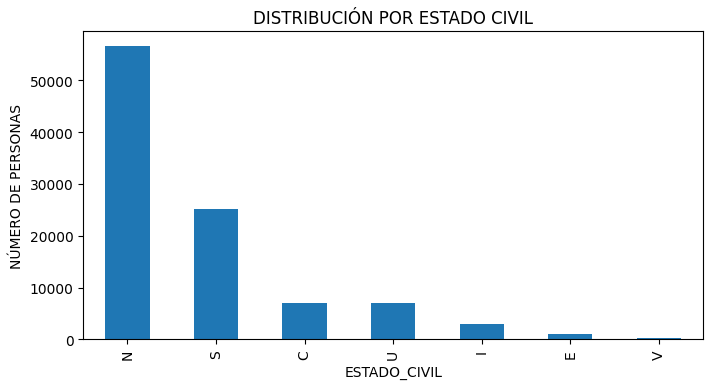

In [ ]:
plt.xlabel("ESTADO_CIVIL")
plt.ylabel("NÚMERO DE PERSONAS")
plt.title("DISTRIBUCIÓN POR ESTADO CIVIL")
df["ESTADO_CIVIL"].value_counts().plot(kind='bar', figsize=(8,4))


Análisis ESTRATO

In [ ]:
#Estado civil del usuario. Valores de chequeo: V - Viudo; E - Separado ; U - Unión Libre ; C - Casado; S - Soltero; I - Indiferente ,  N No Ingresado
df["ESTRATO"].value_counts()

ESTRATO
1    44380
2    36679
3    16150
4     2133
5      485
6      173
Name: count, dtype: int64

In [ ]:
df["ESTRATO"].unique()

array([2, 1, 3, 4, 6, 5])

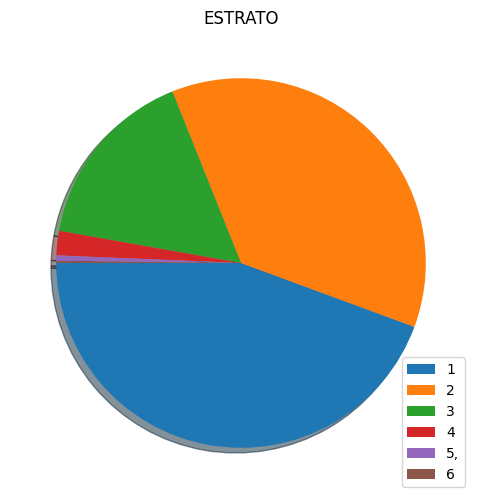

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('ESTRATO')
ay = df["ESTRATO"].value_counts()
mylabels = ['1', '2', '3', '4', '5,', '6']
plt.pie(df["ESTRATO"].value_counts(),  startangle = 180,shadow = True)
plt.legend(mylabels, loc='lower right',)
plt.show()

<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR ESTRATO'}, xlabel='ESTRATO', ylabel='NÚMERO DE APRENDICES'>

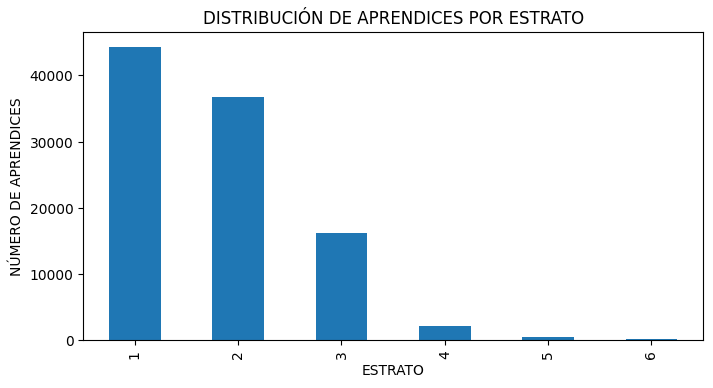

In [ ]:
plt.xlabel("ESTRATO")
plt.ylabel("NÚMERO DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR ESTRATO")
df["ESTRATO"].value_counts().plot(kind='bar', figsize=(8,4))

In [ ]:
print("ESTRATO 1 {:.2f} %".format(df.apply(lambda x: x['ESTRATO'] == 1, axis=1).sum() / len(df) *100))
print("ESTRATO 2 {:.2f} %".format(df.apply(lambda x: x['ESTRATO'] == 2, axis=1).sum() / len(df) *100))
print("ESTRATO 3 {:.2f} %".format(df.apply(lambda x: x['ESTRATO'] == 3, axis=1).sum() / len(df) *100))
print("ESTRATO 4 {:.2f} %".format(df.apply(lambda x: x['ESTRATO'] == 4, axis=1).sum() / len(df) *100))
print("ESTRATO 5 {:.2f} %".format(df.apply(lambda x: x['ESTRATO'] == 5, axis=1).sum() / len(df) *100))
print("ESTRATO 6 {:.2f} %".format(df.apply(lambda x: x['ESTRATO'] == 6, axis=1).sum() / len(df) *100))

ESTRATO 1 44.38 %
ESTRATO 2 36.68 %
ESTRATO 3 16.15 %
ESTRATO 4 2.13 %
ESTRATO 5 0.48 %
ESTRATO 6 0.17 %


PUNTAJE ICFES

In [ ]:
df["PUNTAJE_ICFES"].value_counts()

PUNTAJE_ICFES
50,00     51
45,00     46
48,00     41
49,00     37
300,00    35
          ..
351,00     1
470,00     1
591,00     1
379,00     1
813,00     1
Name: count, Length: 467, dtype: int64

<Axes: >

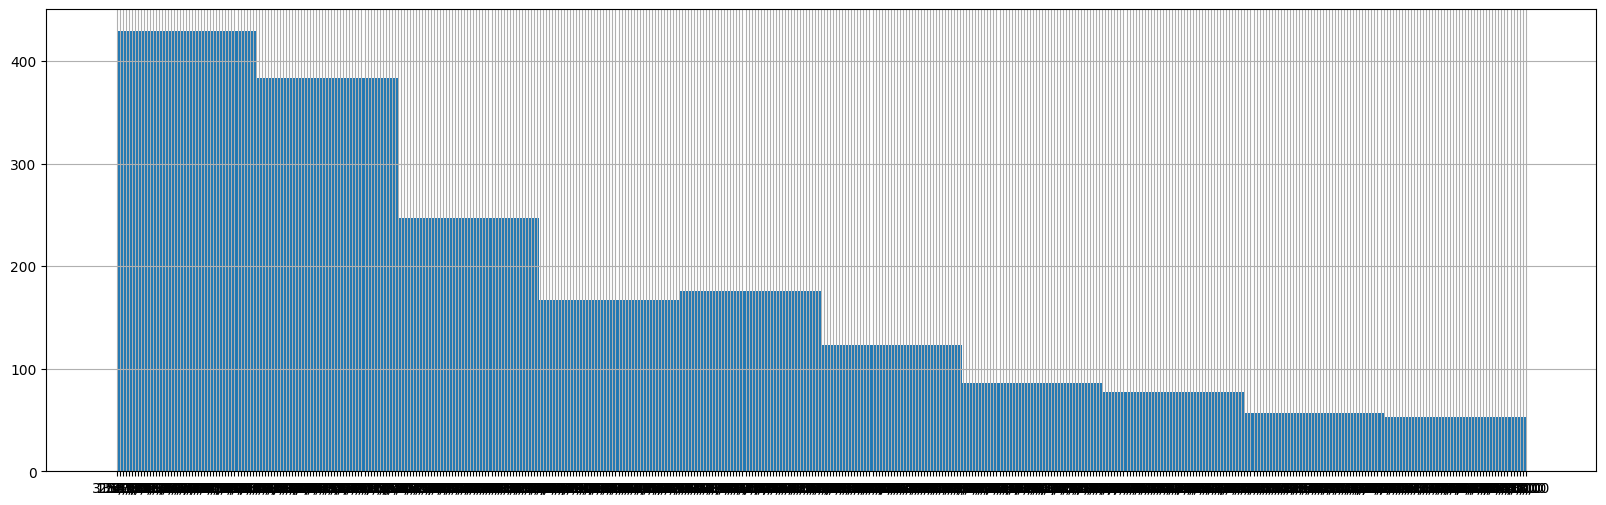

In [ ]:
plt.figure(figsize=(20, 6))
df["PUNTAJE_ICFES"].hist()

NIVEL_SISBEN

In [ ]:
df["SISBEN"].value_counts()

NameError: name 'df' is not defined

In [ ]:
df["SISBEN"].unique()

array([nan])

DBU_HIJOS

In [ ]:
df["DBU_HIJOS"].value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
df["DBU_HIJOS"].unique()

array([nan])

In [ ]:
print("número de instancias sin valor en DBU_HIJOS: ",df["DBU_HIJOS"].isna().sum())

número de instancias sin valor en DBU_HIJOS:  38987


COD_PAIS_RESIDENCIA

In [ ]:
df["COD_PAIS_RESISENCIA"].value_counts()

COD_PAIS_RESISENCIA
57     99688
58        55
51        40
593       34
147       31
34        27
54        19
185       18
56        16
52        11
1         10
507        9
504        6
506        5
591        4
39         3
505        3
49         3
123        2
180        2
595        2
503        1
106        1
43         1
188        1
46         1
297        1
178        1
189        1
55         1
61         1
53         1
81         1
Name: count, dtype: int64

In [ ]:
df["COD_PAIS_RESISENCIA"].unique()

array([ 57,  58, 591, 593,  54,  52,  51, 506,  56,  34,   1, 507, 123,
       185, 505, 147, 504,  53,  61,  55, 180, 189, 595, 297,  49, 178,
        39,  46, 188,  43, 106, 503,  81])

In [ ]:
print("Número de valores únicos: ",len(df["COD_PAIS_RESISENCIA"].unique()))

Número de valores únicos:  33


In [ ]:
frecuencia = df["COD_PAIS_RESISENCIA"].value_counts()
total_valores = len(df["COD_PAIS_RESISENCIA"])
for pais, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"País: {pais}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

País: 57, Frecuencia: 99688, Porcentaje: 99.69%
País: 58, Frecuencia: 55, Porcentaje: 0.06%
País: 51, Frecuencia: 40, Porcentaje: 0.04%
País: 593, Frecuencia: 34, Porcentaje: 0.03%
País: 147, Frecuencia: 31, Porcentaje: 0.03%
País: 34, Frecuencia: 27, Porcentaje: 0.03%
País: 54, Frecuencia: 19, Porcentaje: 0.02%
País: 185, Frecuencia: 18, Porcentaje: 0.02%
País: 56, Frecuencia: 16, Porcentaje: 0.02%
País: 52, Frecuencia: 11, Porcentaje: 0.01%
País: 1, Frecuencia: 10, Porcentaje: 0.01%
País: 507, Frecuencia: 9, Porcentaje: 0.01%
País: 504, Frecuencia: 6, Porcentaje: 0.01%
País: 506, Frecuencia: 5, Porcentaje: 0.01%
País: 591, Frecuencia: 4, Porcentaje: 0.00%
País: 39, Frecuencia: 3, Porcentaje: 0.00%
País: 505, Frecuencia: 3, Porcentaje: 0.00%
País: 49, Frecuencia: 3, Porcentaje: 0.00%
País: 123, Frecuencia: 2, Porcentaje: 0.00%
País: 180, Frecuencia: 2, Porcentaje: 0.00%
País: 595, Frecuencia: 2, Porcentaje: 0.00%
País: 503, Frecuencia: 1, Porcentaje: 0.00%
País: 106, Frecuencia: 1, Po

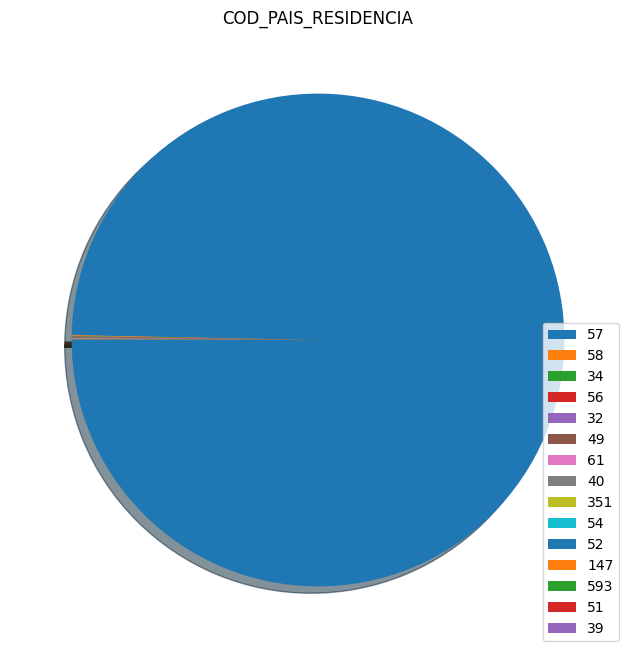

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('COD_PAIS_RESIDENCIA')
ay = df["COD_PAIS_RESISENCIA"].value_counts()
mylabels = [57,  58,  34,  56,  32, 49, 61,  40, 351,  54,  52, 147, 593,
        51,  39]
plt.pie(df["COD_PAIS_RESISENCIA"].value_counts(),  startangle = 180,shadow = True)
plt.legend(mylabels, loc='lower right',)
plt.show()

<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR PAIS DE RESIDENCIA'}, xlabel='COD_PAIS_RESISENCIA', ylabel='No. DE APRENDICES'>

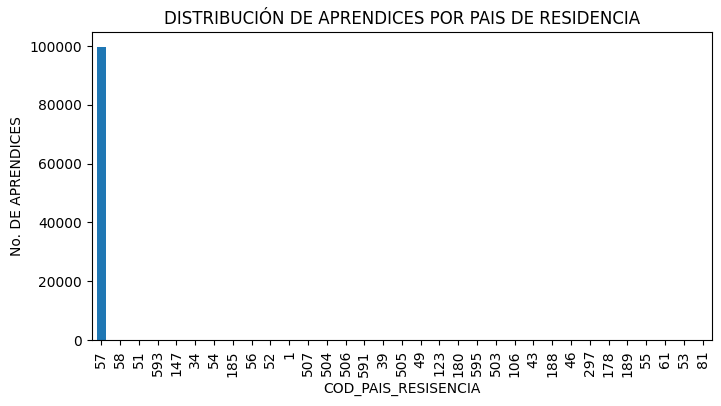

In [ ]:
plt.xlabel("PAIS DE RESIDENCIA")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR PAIS DE RESIDENCIA")
df["COD_PAIS_RESISENCIA"].value_counts().plot(kind='bar',  figsize=(8,4))

COD_DPTO_RESIDENCIA

In [ ]:
df["COD_DPTO_RESIDENCIA"].value_counts()

COD_DPTO_RESIDENCIA
57011     16866
57005     12392
57076      8199
57025      6871
57068      6212
          ...  
593015        1
595010        1
52020         1
185004        1
58016         1
Name: count, Length: 164, dtype: int64

In [ ]:
df["COD_DPTO_RESIDENCIA"].unique()

array([ 57050,  57013,  57054,  57005,  57025,  57015,  57008,  57017,
        57027,  57076,  57070,  57068,  57011,  57041,  57099,  57047,
        57052,  57073,  57088,  57066,  57085,  57095,  57018,  57063,
        57023,  57044,  57020,  57019,  57086,  57081,  58011, 591002,
        57094, 593020,  54010,  57091, 593001,  52021,  51003,  58022,
        57097,  58015, 506007,  56007,  34014,   1003,  58007,  52023,
       507008, 123003,  56013,  58019,  51013,  52016,   1008,  58013,
        34009,  51007,  58014,  52028, 185029, 505010, 999999, 147013,
        51001, 506003,  56012, 147043, 504007,  58004, 593008,  34062,
        53007,  61006,  34018, 147014,  34051, 147034, 185030,  34013,
       593018,  51011, 147018,  55003,  58006, 180023,  54008,  52019,
       189051,  34038, 591004, 147016, 147035, 185001,  34058, 593016,
         1007,  54009,  34042, 185004,  52020,   1001,  51005, 593019,
       595010, 593015, 147003, 297001,  51018,  52005,  49004,  34060,
      

In [ ]:
print("Número de valores únicos: ",len(df["COD_DPTO_RESIDENCIA"].unique()))

Número de valores únicos:  164


In [ ]:
frecuencia = df["COD_DPTO_RESIDENCIA"].value_counts()
total_valores = len(df["COD_DPTO_RESIDENCIA"])
for departamento, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"Departamento: {departamento}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

Departamento: 57011, Frecuencia: 16866, Porcentaje: 16.87%
Departamento: 57005, Frecuencia: 12392, Porcentaje: 12.39%
Departamento: 57076, Frecuencia: 8199, Porcentaje: 8.20%
Departamento: 57025, Frecuencia: 6871, Porcentaje: 6.87%
Departamento: 57068, Frecuencia: 6212, Porcentaje: 6.21%
Departamento: 57008, Frecuencia: 5020, Porcentaje: 5.02%
Departamento: 57013, Frecuencia: 4411, Porcentaje: 4.41%
Departamento: 57073, Frecuencia: 3598, Porcentaje: 3.60%
Departamento: 57015, Frecuencia: 3069, Porcentaje: 3.07%
Departamento: 57054, Frecuencia: 2877, Porcentaje: 2.88%
Departamento: 57041, Frecuencia: 2704, Porcentaje: 2.70%
Departamento: 57052, Frecuencia: 2415, Porcentaje: 2.42%
Departamento: 57020, Frecuencia: 2345, Porcentaje: 2.34%
Departamento: 57066, Frecuencia: 2332, Porcentaje: 2.33%
Departamento: 57023, Frecuencia: 2297, Porcentaje: 2.30%
Departamento: 57019, Frecuencia: 2190, Porcentaje: 2.19%
Departamento: 57047, Frecuencia: 2147, Porcentaje: 2.15%
Departamento: 57017, Frecue

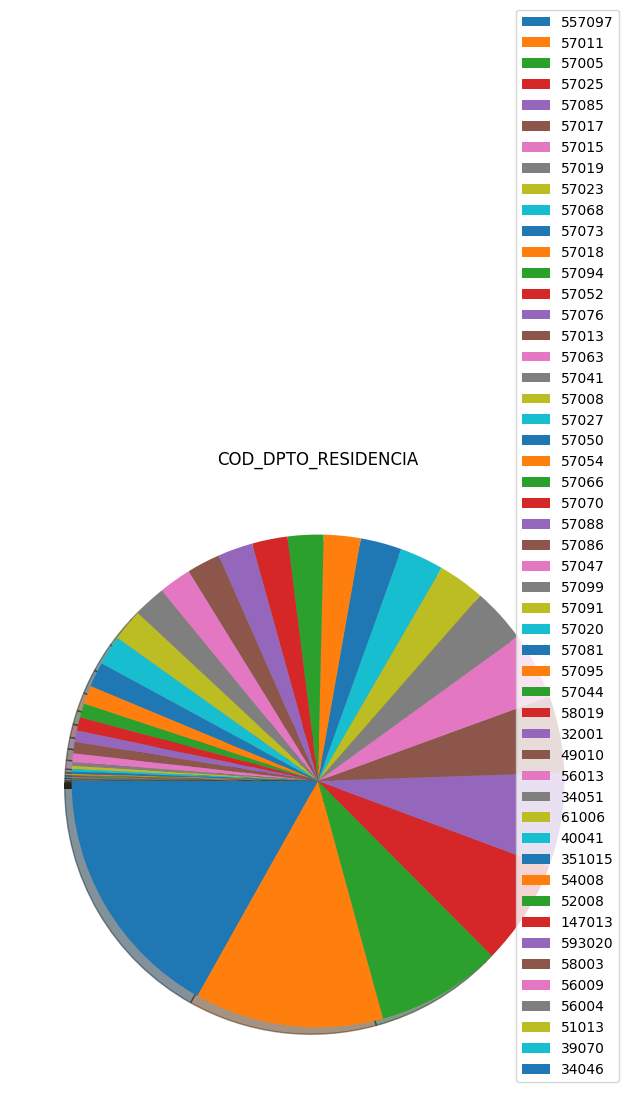

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('COD_DPTO_RESIDENCIA')
ay = df["COD_DPTO_RESIDENCIA"].value_counts()
mylabels = [557097,  57011,  57005,  57025,  57085,  57017,  57015,  57019,
        57023,  57068,  57073,  57018,  57094,  57052,  57076,  57013,
        57063,  57041,  57008,  57027,  57050,  57054,  57066,  57070,
        57088,  57086,  57047,  57099,  57091,  57020,  57081,  57095,
        57044,  58019,  32001,  49010,  56013,  34051,  61006,  40041,
       351015,  54008,  52008, 147013, 593020,  58003,  56009,  56004,
        51013,  39070,  34046]
plt.pie(df["COD_DPTO_RESIDENCIA"].value_counts(),  startangle = 180,shadow = True)
plt.legend(mylabels, loc='lower right',)
plt.show()

<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR DPTO DE RESIDENCIA'}, xlabel='DEPARTAMENTO DE RESIDENCIA', ylabel='No. DE APRENDICES'>

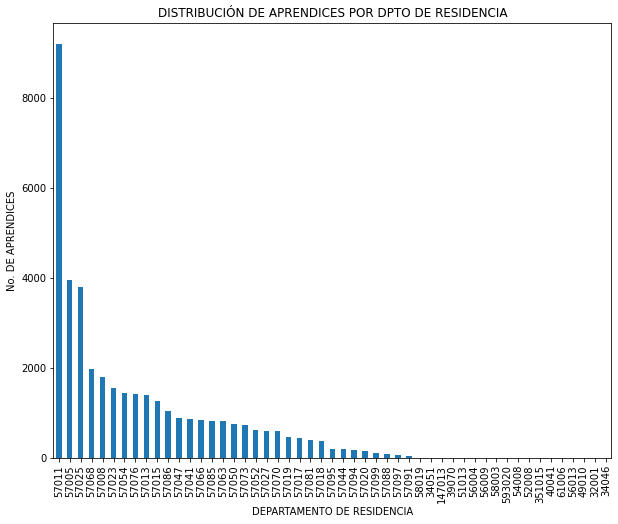

In [ ]:
plt.xlabel("DEPARTAMENTO DE RESIDENCIA")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR DPTO DE RESIDENCIA")
df["COD_DPTO_RESIDENCIA"].value_counts().plot(kind='bar',  figsize=(10,8))

COD_MUNICIPIO_RESIDENCIA

In [ ]:
df["COD_MUNICIPIO_RESIDENCIA"].value_counts()

COD_MUNICIPIO_RESIDENCIA
57011001     16862
57005001      4745
57076001      3570
57008001      2838
57013001      2731
             ...  
56006001         1
52028001         1
57054871         1
178065001        1
58016001         1
Name: count, Length: 1248, dtype: int64

In [ ]:
print("Número de valores únicos: ",len(df["COD_MUNICIPIO_RESIDENCIA"].unique()))

Número de valores únicos:  1248


In [ ]:
frecuencia = df["COD_MUNICIPIO_RESIDENCIA"].value_counts()
total_valores = len(df["COD_MUNICIPIO_RESIDENCIA"])
for municipio, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"Municipio: {municipio}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

Municipio: 57011001, Frecuencia: 16862, Porcentaje: 16.86%
Municipio: 57005001, Frecuencia: 4745, Porcentaje: 4.75%
Municipio: 57076001, Frecuencia: 3570, Porcentaje: 3.57%
Municipio: 57008001, Frecuencia: 2838, Porcentaje: 2.84%
Municipio: 57013001, Frecuencia: 2731, Porcentaje: 2.73%
Municipio: 57068001, Frecuencia: 1807, Porcentaje: 1.81%
Municipio: 57054001, Frecuencia: 1696, Porcentaje: 1.70%
Municipio: 57073001, Frecuencia: 1630, Porcentaje: 1.63%
Municipio: 57066001, Frecuencia: 1317, Porcentaje: 1.32%
Municipio: 57025754, Frecuencia: 1212, Porcentaje: 1.21%
Municipio: 57050001, Frecuencia: 1183, Porcentaje: 1.18%
Municipio: 57047001, Frecuencia: 1138, Porcentaje: 1.14%
Municipio: 57063001, Frecuencia: 1120, Porcentaje: 1.12%
Municipio: 57017001, Frecuencia: 990, Porcentaje: 0.99%
Municipio: 57020001, Frecuencia: 980, Porcentaje: 0.98%
Municipio: 57041001, Frecuencia: 931, Porcentaje: 0.93%
Municipio: 57019001, Frecuencia: 865, Porcentaje: 0.86%
Municipio: 57008758, Frecuencia: 

COD_ZONA_RESIDENCIA

In [ ]:
df["COD_ZONA_RESIDENCIA"].value_counts()

COD_ZONA_RESIDENCIA
11.0     195
8.0      192
10.0     156
7.0      129
161.0    115
        ... 
325.0      1
363.0      1
416.0      1
349.0      1
326.0      1
Name: count, Length: 347, dtype: int64

In [ ]:
print("Número de valores únicos: ",len(df["COD_ZONA_RESIDENCIA"].unique()))

Número de valores únicos:  348


In [ ]:
valores_nulos = df["COD_ZONA_RESIDENCIA"].isnull().sum()
total_valores = len(df["COD_ZONA_RESIDENCIA"])
porcentaje_nulos = (valores_nulos / total_valores) * 100
print(f"Valores nulos en 'COD_ZONA_RESIDENCIA': {valores_nulos}")
print(f"Porcentaje de valores nulos: {porcentaje_nulos:.2f}%")

Valores nulos en 'COD_ZONA_RESIDENCIA': 96323
Porcentaje de valores nulos: 96.32%


COD_BARRIO_RESIDENCIA

In [ ]:
df["COD_BARRIO_RESIDENCIA"].value_counts()

COD_BARRIO_RESIDENCIA
304.0     33
372.0     17
564.0     16
3369.0    15
3094.0    12
          ..
2156.0     1
3.0        1
958.0      1
8268.0     1
5182.0     1
Name: count, Length: 1643, dtype: int64

In [ ]:
print("Número de valores únicos: ",len(df["COD_BARRIO_RESIDENCIA"].unique()))

Número de valores únicos:  1644


In [ ]:
valores_nulos = df["COD_BARRIO_RESIDENCIA"].isnull().sum()
total_valores = len(df["COD_BARRIO_RESIDENCIA"])
porcentaje_nulos = (valores_nulos / total_valores) * 100
print(f"Valores nulos en 'COD_BARRIO_RESIDENCIA': {valores_nulos}")
print(f"Porcentaje de valores nulos: {porcentaje_nulos:.2f}%")

Valores nulos en 'COD_BARRIO_RESIDENCIA': 96796
Porcentaje de valores nulos: 96.80%


Identificación de valores nan en todas las características:

In [ ]:
df.isna().sum()

NIS                              0
GENERO                           0
FECHA_NACIMIENTO                 0
ESTADO_CIVIL                     0
ESTRATO                          0
PUNTAJE_ICFES                98202
SISBEN                      100000
DBU_HIJOS                   100000
COD_PAIS_RESISENCIA              0
COD_DPTO_RESIDENCIA              0
COD_MUNICIPIO_RESIDENCIA         0
COD_ZONA_RESIDENCIA          96323
COD_BARRIO_RESIDENCIA        96796
dtype: int64

In [ ]:
df.columns

Index(['NIS', 'GENERO', 'FECHA_NACIMIENTO', 'ESTADO_CIVIL', 'ESTRATO',
       'PUNTAJE_ICFES', 'SISBEN', 'DBU_HIJOS', 'COD_PAIS_RESISENCIA',
       'COD_DPTO_RESIDENCIA', 'COD_MUNICIPIO_RESIDENCIA',
       'COD_ZONA_RESIDENCIA', 'COD_BARRIO_RESIDENCIA'],
      dtype='object')

In [ ]:
col = ['NIS', 'GENERO', 'FECHA_NACIMIENTO', 'ESTADO_CIVIL', 'ESTRATO',
       'PUNTAJE_ICFES', 'SISBEN', 'DBU_HIJOS', 'COD_PAIS_RESISENCIA',
       'COD_DPTO_RESIDENCIA', 'COD_MUNICIPIO_RESIDENCIA',
       'COD_ZONA_RESIDENCIA', 'COD_BARRIO_RESIDENCIA']
for n in col:
  print(n,"\n",df[n].value_counts())
  #print(col, df[n])

NIS 
 NIS
12296839    1
10128364    1
11220445    1
12175709    1
12971187    1
           ..
12978951    1
7552481     1
12182157    1
10133402    1
9225995     1
Name: count, Length: 100000, dtype: int64
GENERO 
 GENERO
F    52928
M    47072
Name: count, dtype: int64
FECHA_NACIMIENTO 
 FECHA_NACIMIENTO
5/01/1980     103
26/05/1992     69
7/01/1980      63
8/03/1992      62
1/01/1980      62
             ... 
2/05/2010       1
15/01/1971      1
24/07/1960      1
21/05/1964      1
15/02/2000      1
Name: count, Length: 20797, dtype: int64
ESTADO_CIVIL 
 ESTADO_CIVIL
N    56620
S    25091
C     7067
U     7056
I     3030
E      936
V      200
Name: count, dtype: int64
ESTRATO 
 ESTRATO
1    44380
2    36679
3    16150
4     2133
5      485
6      173
Name: count, dtype: int64
PUNTAJE_ICFES 
 PUNTAJE_ICFES
50,00     51
45,00     46
48,00     41
49,00     37
300,00    35
          ..
351,00     1
470,00     1
591,00     1
379,00     1
813,00     1
Name: count, Length: 467, dtype: int64
SI